In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv("HMEQ.csv", engine='python')
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df['JOB'].fillna('Other', inplace=True)
df.fillna(df.mean(), inplace=True)

In [5]:
df_dummy = pd.get_dummies(df)
df_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808717,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [6]:
df_y = df_dummy['BAD']
df_x = df_dummy.drop('BAD', axis=1, inplace=False)

In [7]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size =0.3, random_state=1234)
print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (2623, 18)
train data Y size :  (2623,)
test data X size :  (1125, 18)
test data Y size :  (1125, 18)


In [8]:
svm_uncusomized = SVC(random_state=1234)
svm_uncusomized.fit(df_train_x, df_train_y);

print("Accuracy on training set ", svm_uncusomized.score(df_train_x, df_train_y))
print("Accuracy on test set ", svm_uncusomized.score(df_test_x, df_test_y))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set  1.0
Accuracy on test set  0.9075555555555556


In [10]:
train_accuracy = []
test_accuracy = []
para_c = [10**c for c in range(-2,2)]
for v_C in para_c:
    svm = SVC(random_state=1234, C=v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["C"] = para_c
df_accuracy_lr["TrainScore"] = train_accuracy
df_accuracy_lr["TestScore"] = test_accuracy
df_accuracy_lr.round(3)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainScore,TestScore
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,1.000,0.908
3,10.00,1.000,0.908


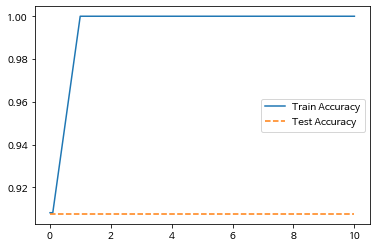

In [11]:
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [12]:
train_accuracy = []
test_accuracy = []
para_gamma = [10** gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm = SVC(random_state=1234, C=0.1, gamma=v_gamma)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["gamma"] = para_gamma
df_accuracy_lr["TrainScore"] = train_accuracy
df_accuracy_lr["TestScore"] = test_accuracy
df_accuracy_lr.round(3)


,gamma,TrainScore,TestScore
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.908,0.908


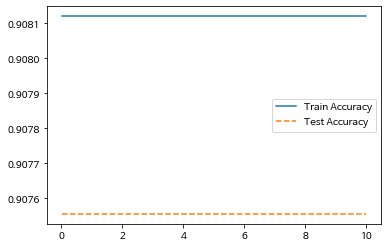

In [13]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [14]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns =v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [16]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size =0.3, random_state=1234)
print("train data X size : ", df_scaled_train_x.shape)
print("test data X size : " ,df_scaled_test_x.shape)



train data X size :  (2623, 18)
test data X size :  (1125, 18)


In [19]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set:", svm_scaled.score(df_scaled_train_x, df_train_y))
print("Accuracy on test set:", svm_scaled.score(df_scaled_test_x, df_test_y))


Accuracy on training set: 0.9435760579489134
Accuracy on test set: 0.9351111111111111


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
train_accuracy = []
test_accuracy = []
para_c = [10**c for c in range(-2,2)]
for v_C in para_c:
    svm = SVC(random_state=1234, C=v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["C"] = para_c
df_accuracy_lr["TrainScore"] = train_accuracy
df_accuracy_lr["TestScore"] = test_accuracy
df_accuracy_lr.round(3)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainScore,TestScore
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.944,0.935
3,10.00,0.979,0.949


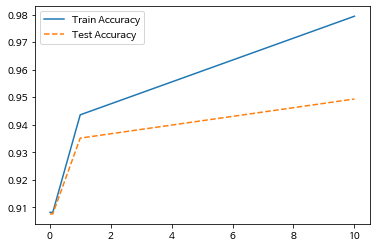

In [22]:
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [24]:
train_accuracy = []
test_accuracy = []
para_gamma = [10** gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm = SVC(random_state=1234, C=1, gamma=v_gamma)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["gamma"] = para_gamma
df_accuracy_lr["TrainScore"] = train_accuracy
df_accuracy_lr["TestScore"] = test_accuracy
df_accuracy_lr.round(3)


,gamma,TrainScore,TestScore
0,0.01,0.923,0.920
1,0.10,0.960,0.942
2,1.00,0.996,0.920
3,10.00,1.000,0.908


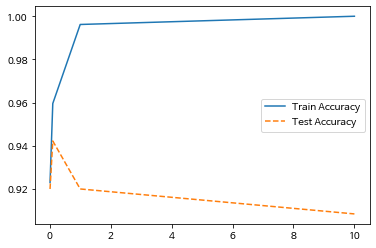

In [25]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [27]:
svm_final = SVC(random_state=1234, C=1, gamma=0.1)
svm_final.fit(df_scaled_train_x, df_train_y)
y_pred = svm_final.predict(df_scaled_test_x)

print("Accuracy on training set :", svm_final.score(df_scaled_train_x, df_train_y))
print("Accuracy on test set :", svm_final.score(df_scaled_test_x, df_test_y))
print("Confusion matrix:\n", confusion_matrix(df_test_y, y_pred))



Accuracy on training set : 0.9595882577201678
Accuracy on test set : 0.9422222222222222
Confusion matrix:
 [[1021    0]
 [  65   39]]


In [29]:
estimator = SVC(random_state=1234)
param_grid = {"C":para_c, "gamma":para_gamma}

grid_rf = GridSearchCV(estimator,param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_scaled_train_x,df_train_y)

print("best model : ", grid_rf.best_estimator_)
print("best parameter: ", grid_rf.best_params_)
print("best score : ", grid_rf.best_score_.round(3))




/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best model :  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)
best parameter:  {'C': 10, 'gamma': 0.1}
best score :  0.95
